In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Create_Dataset import create_dataset
import cv2 
from keras.utils import image_dataset_from_directory

In [2]:
data = 'C:\\Users\\Aship\\Downloads\\data'
x_train, x_test, y_train, y_test, d = create_dataset(data)

In [9]:
x_train[0].shape

(300, 300, 3)

In [24]:
import mediapipe as mp

mpHands = mp.solutions.hands
mpHandsMesh = mpHands.Hands(static_image_mode=False, max_num_hands=2, min_detection_confidence=0.75, min_tracking_confidence=0.5)
mpDraw = mp.solutions.drawing_utils

def get_coords(frame):
    """
    Get the coordinates of all the landmarks of the hand.

    Parameters:
    x (numpy.ndarray): The frame to preprocess.

    Returns:
    numpy.ndarray: The preprocessed frame.
    """
    # Resize the frame to the target size
    frame_resized = cv2.resize(frame, (300, 300))
    # Normalize the frame
    frame_normalized = frame_resized / 255.0
    # Expand dimensions to match the model input shape
    frame_expanded = np.expand_dims(frame_normalized, axis=0)

    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    output = mpHandsMesh.process(rgb)
    if output.multi_hand_landmarks:
        for i in output.multi_hand_landmarks:
            print(i)
            return i




In [27]:
from CameraClass import HandDetector
handdetector = HandDetector()
handdetector.landmark_coordinates()

TypeError: detect_hands() missing 1 required positional argument: 'self'

TypeError: Cannot cast array data from dtype('float32') to dtype('uint8') according to the rule 'safe'

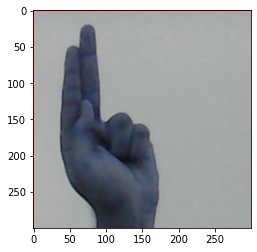

In [25]:
plt.imshow(x_train[0])
get_coords(x_train[0])